In [3]:
import pandas as pd

# Select the company symbol for EDA
COMPANY = "CBA.AX"  # Change this to any symbol you want

# Load the combined (pivoted) data
df_all = pd.read_csv("../Data/output_all_companies.csv", index_col=0, parse_dates=True)

# Extract the series for the selected company
df = df_all[[COMPANY]].rename(columns={COMPANY: "closing_price"}).copy()
df = df.reset_index().rename(columns={"index": "date"})

# Quick sanity check
print(df.head())
print(df.tail())
print("Data range:", df["date"].min(), "to", df["date"].max())

        date  closing_price
0 2023-04-27          99.10
1 2023-04-28          99.36
2 2023-05-01         100.44
3 2023-05-02         100.10
4 2023-05-03          98.29
          date  closing_price
635 2025-10-27         171.67
636 2025-10-28         174.02
637 2025-10-29         170.40
638 2025-10-30         170.53
639 2025-10-31         171.64
Data range: 2023-04-27 00:00:00 to 2025-10-31 00:00:00


## How to use this notebook
- Change the `COMPANY` variable in the first code cell to analyze a different stock (e.g., "NAB.AX", "BHP.AX", etc.).
- The notebook will automatically load and plot the selected company's closing price and moving averages.

In [4]:
# Example moving averages: 7, 20, and 50-day
df["ma_7"] = df["closing_price"].rolling(window=7, min_periods=1).mean()
df["ma_20"] = df["closing_price"].rolling(window=20, min_periods=1).mean()
df["ma_50"] = df["closing_price"].rolling(window=50, min_periods=1).mean()

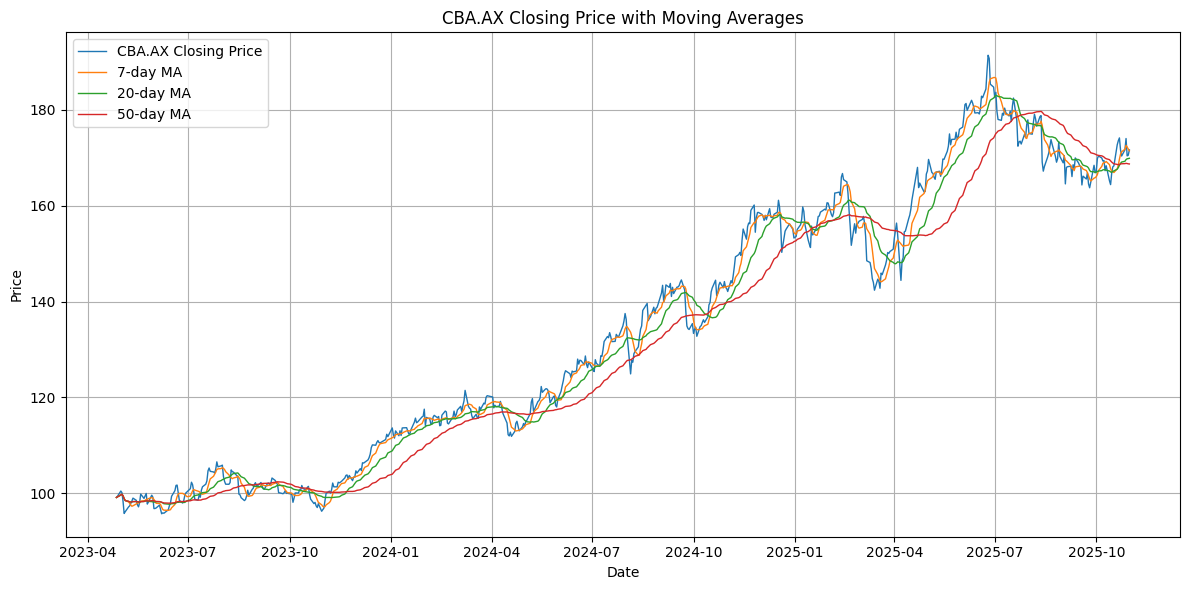

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["closing_price"], label=f"{COMPANY} Closing Price", linewidth=1)
plt.plot(df["date"], df["ma_7"], label="7-day MA", linewidth=1)
plt.plot(df["date"], df["ma_20"], label="20-day MA", linewidth=1)
plt.plot(df["date"], df["ma_50"], label="50-day MA", linewidth=1)
plt.title(f"{COMPANY} Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()